In [160]:
import sklearn.svm as svm
from os import listdir
from os.path import isfile, join
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn import model_selection, preprocessing
import collections
import pickle
import random

dim_x = 70
dim_y = 70
n_dim = 3

In [161]:
html = bs(urllib.request.urlopen("https://www.cia.gov/library/publications/the-world-factbook/docs/flagsoftheworld.html"), "lxml")

div_names = [div.getText() for div in html.find_all("div", attrs={"class": "flag-description"})]
flags = [div.find("img")["src"][-11:-9] for div in html.find_all("div", attrs={"class": "flag-image"})]
map = {flags[i]: div_names[i] for i in range(len(flags))}

replace = {'Burma': 'Myanmar', 'Czechia': 'Czech Republic', 'Holy See (Vatican City)': 'Vatican City', 'Saint Martin': 'France'}
remove = ["Dhekelia", "Svalbard", "European Union", "Navassa Island", "Christmas Island", "Jan Mayen", "Bouvet Island", "Akrotiri"]

items = map.items()
for key, value in items:
    if value in replace.keys():
        map[key] = replace[value]
print(map)

{'AF': 'Afghanistan', 'AX': 'Akrotiri', 'AL': 'Albania', 'AG': 'Algeria', 'AQ': 'American Samoa', 'AN': 'Andorra', 'AO': 'Angola', 'AV': 'Anguilla', 'AC': 'Antigua and Barbuda', 'AR': 'Argentina', 'AM': 'Armenia', 'AA': 'Aruba', 'AT': 'Ashmore and Cartier Islands', 'AS': 'Australia', 'AU': 'Austria', 'AJ': 'Azerbaijan', 'BF': 'Bahamas, The', 'BA': 'Bahrain', 'BG': 'Bangladesh', 'BB': 'Barbados', 'BO': 'Belarus', 'BE': 'Belgium', 'BH': 'Belize', 'BN': 'Benin', 'BD': 'Bermuda', 'BT': 'Bhutan', 'BL': 'Bolivia', 'BK': 'Bosnia and Herzegovina', 'BC': 'Botswana', 'BV': 'Bouvet Island', 'BR': 'Brazil', 'IO': 'British Indian Ocean Territory', 'VI': 'British Virgin Islands', 'BX': 'Brunei', 'BU': 'Bulgaria', 'UV': 'Burkina Faso', 'BM': 'Myanmar', 'BY': 'Burundi', 'CV': 'Cabo Verde', 'CB': 'Cambodia', 'CM': 'Cameroon', 'CA': 'Canada', 'CJ': 'Cayman Islands', 'CT': 'Central African Republic', 'CD': 'Chad', 'CI': 'Chile', 'CH': 'China', 'KT': 'Christmas Island', 'IP': 'Clipperton Island', 'CK': 'C

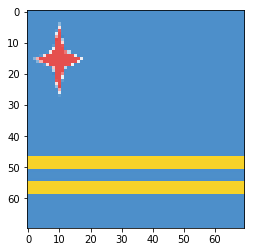

[ 77 143 202 ...  77 143 202]
242
(14700,)
14700


In [162]:
mypath = "/Users/rohitneppalli/Downloads/Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath,f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])
images = [np.array(cv2.resize(mpimg.imread(join(mypath, file), 0), (dim_x, dim_y)))[
    :, :, 0:n_dim].reshape(dim_x*dim_y*n_dim) for file in onlyfiles if map[file[file.index("-") - 2: file.index("-")]] not in remove]  # screws up image color, but down to 2 dimensions
plt.imshow(images[0].reshape(dim_x, dim_y, n_dim))
plt.show()
print(images[0])
print(len(images))
print(np.array(images[0]).shape)
print(np.array(images[0]).size)

map = {key: value for key, value in map.items() if value not in remove}
map = collections.OrderedDict(sorted(map.items()))

                Country   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5  \
0                 Aruba  0.301961  0.560784  0.792157  0.301961  0.560784   
1   Antigua and Barbuda  0.384314  0.000000  0.078431  0.000000  0.000000   
2  United Arab Emirates  0.745098  0.000000  0.152941  0.745098  0.000000   
3           Afghanistan  0.000000  0.000000  0.000000  0.000000  0.000000   
4               Algeria  0.117647  0.670588  0.384314  0.117647  0.670588   

    Pixel 6   Pixel 7   Pixel 8   Pixel 9     ...       Pixel 14691  \
0  0.792157  0.301961  0.560784  0.792157     ...          0.792157   
1  0.000000  0.000000  0.000000  0.000000     ...          0.152941   
2  0.152941  0.745098  0.000000  0.152941     ...          0.000000   
3  0.000000  0.000000  0.000000  0.000000     ...          0.282353   
4  0.388235  0.117647  0.670588  0.388235     ...          0.972549   

   Pixel 14692  Pixel 14693  Pixel 14694  Pixel 14695  Pixel 14696  \
0     0.301961     0.560784     0.792157

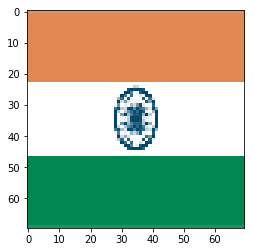

In [163]:
df = pd.DataFrame({"Country": [val for key, val in map.items()]})

for i in range(dim_x*dim_y*n_dim):
    pixels = [images[x][i] for x in range(len(images))]
    df["Pixel " + str(i + 1)] = np.array(pixels) / 255.0
print(df.head())
plt.imshow(images[100].reshape(dim_x,dim_y,n_dim))
plt.show()

In [164]:
# If you're creating model for first time

model = svm.SVC(gamma=0.001, C=1000)
x = df[df.columns.values[1:]]
y = df.Country
model.fit(x, y)
file = open("/Users/rohitneppalli/Downloads/svm_model", "wb")
pickle.dump(model, file)
file.close()

# Otherwise, load in model
# file = open("/Users/rohitneppalli/Downloads/svm_model", "rb")
# model = pickle.load(file)

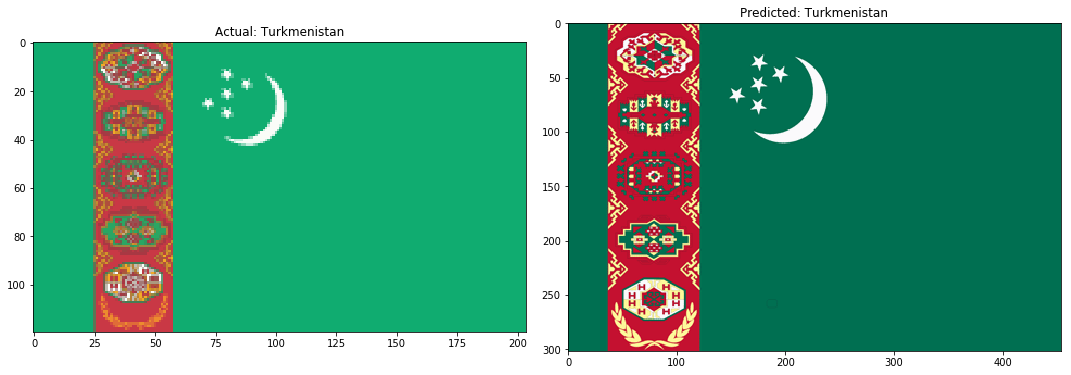

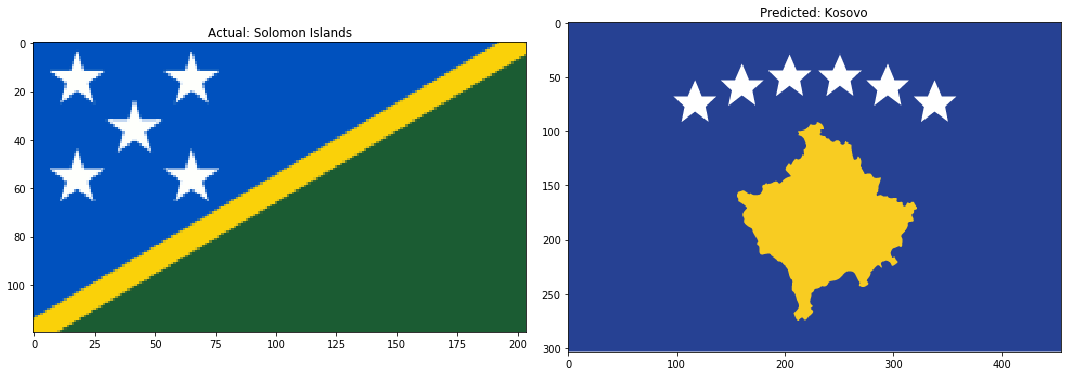

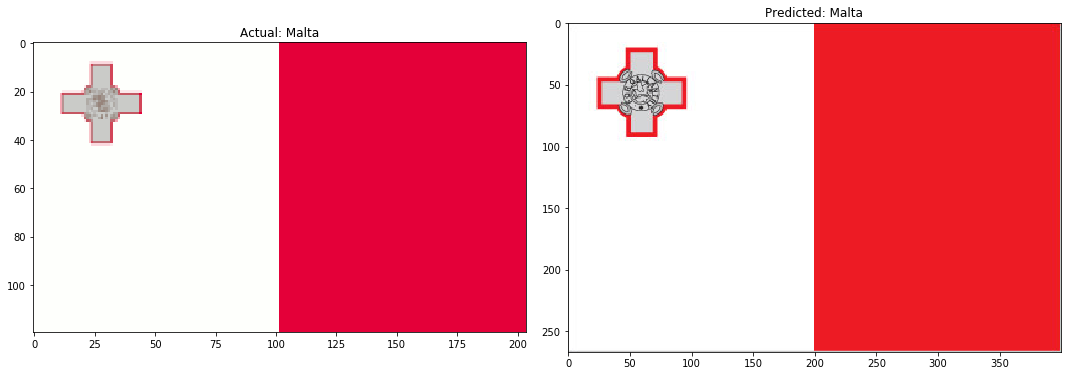

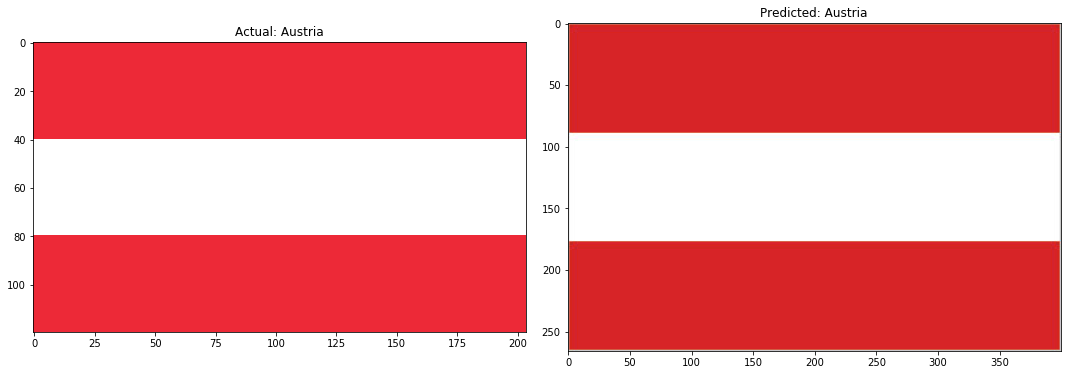

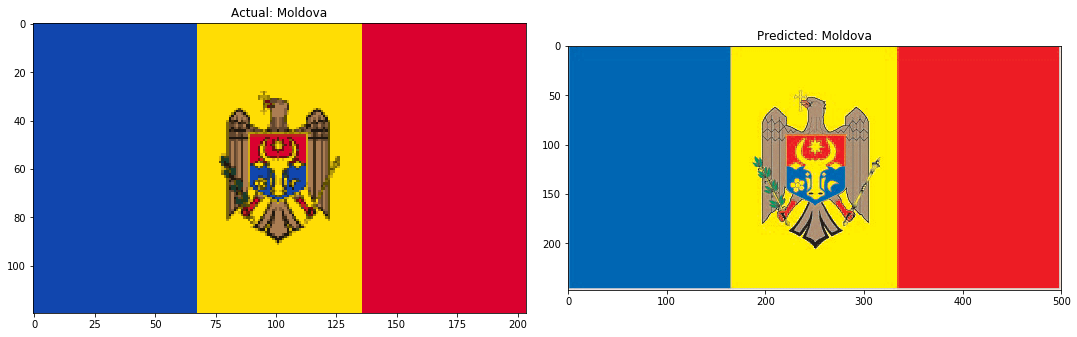

In [165]:
mypath = "/Users/rohitneppalli/Downloads/Test Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = sorted([join(mypath, f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)])

num_to_test = 5
test_images = [random.choice(onlyfiles) for i in range(num_to_test)]

for i in range(len(test_images)):
    f, axarr = plt.subplots(1, 2)
    f.set_figheight(15)
    f.set_figwidth(15)
    f.tight_layout()
    img = test_images[i]
    pixels = np.array(cv2.resize(mpimg.imread(img, 0), (dim_x, dim_y)))[:, :, 0:n_dim].reshape(dim_x*dim_y*n_dim) / 255.0
    axarr[0].imshow(mpimg.imread(img, 0))
    axarr[0].title.set_text("Actual: {0}".format(img[img.find("of-") + 3:img.find(".")].replace("-", " ")))
    prediction = model.predict(pixels.reshape(-1, dim_x*dim_y*n_dim))

    short_hand = [key for key, value in map.items() if value == prediction][0]
    prediction_image = "/Users/rohitneppalli/Downloads/Flags/{0}-flag.png".format(short_hand)
    axarr[1].imshow(mpimg.imread(prediction_image, 0))
    axarr[1].title.set_text("Predicted: {0}".format(prediction[0]))

In [166]:
def checkAccuracy():
    correct = 0
    for img in onlyfiles:
        pixels = np.array(cv2.resize(mpimg.imread(
            img, 0), (dim_x, dim_y)))[:, :, 0:n_dim].reshape(dim_x*dim_y*n_dim) / 255.0
        prediction = model.predict(pixels.reshape(-1, dim_x*dim_y*n_dim))
        pred_formatted = prediction[0].replace(
            ",", "").replace("Saint", "St").replace(" and ", " ").replace("-", " ")
        img_formatted = img.lower().replace("-", " ")
        if pred_formatted.lower().split(" ")[0] in img_formatted:
            correct+=1
        else:
            print("Prediction: {0}\nActual: {1}".format(
                pred_formatted, img[img.find("of-") + 3:img.find(".")].replace("-", " ")))
    print("Accuracy: {0}".format(correct/len(onlyfiles)))
checkAccuracy()

Prediction: New Zealand
Actual: Australia
Prediction: Guam
Actual: Belize
Prediction: Tuvalu
Actual: Fiji
Prediction: Yemen
Actual: Iraq
Prediction: Burkina Faso
Actual: Kiribati
Prediction: Vietnam
Actual: Kyrgyzstan
Prediction: Netherlands
Actual: Luxembourg
Prediction: Indonesia
Actual: Monaco
Prediction: Cyprus
Actual: Nepal
Prediction: Western Sahara
Actual: Palestine
Prediction: Netherlands
Actual: Paraguay
Prediction: Chad
Actual: Romania
Prediction: Honduras
Actual: Sierra Leone
Prediction: Indonesia
Actual: Singapore
Prediction: Russia
Actual: Slovenia
Prediction: Kosovo
Actual: Solomon Islands
Prediction: Micronesia Federated States of
Actual: Somalia
Prediction: Hong Kong
Actual: Switzerland
Prediction: Fiji
Actual: Tuvalu
Accuracy: 0.9035532994923858


Prediction: Ireland


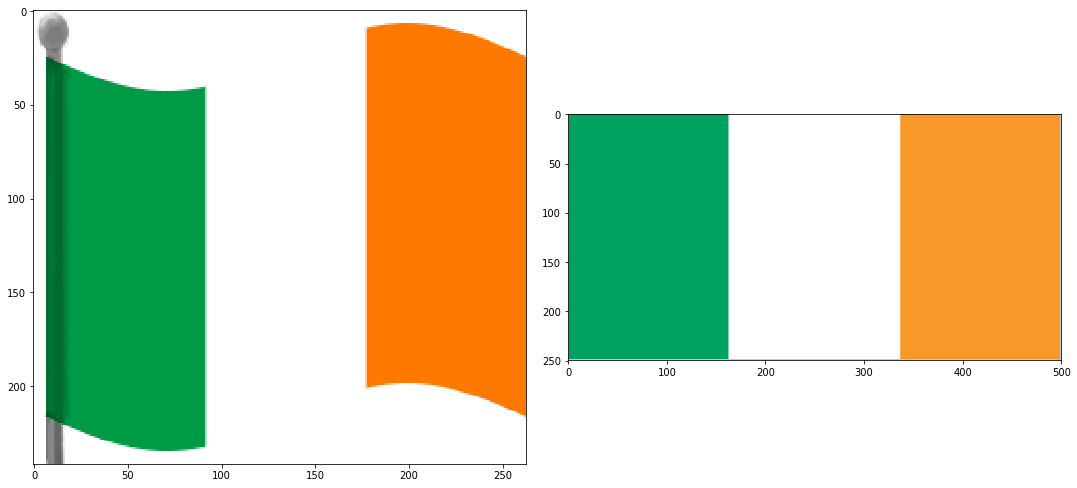

In [167]:
def predictImage(path, x = 0, num_to_test = 1):
    f, axarr = plt.subplots(num_to_test, 2)
    f.set_figheight(15)
    f.set_figwidth(15)
    f.tight_layout()
    img = path
    pixels = np.array(cv2.resize(mpimg.imread(
        img, 0), (dim_x, dim_y)))[:, :, 0:n_dim].reshape(dim_x*dim_y*n_dim) / 255.0
    axarr[0].imshow(mpimg.imread(img, 0))
    prediction = model.predict(pixels.reshape(-1, dim_x*dim_y*n_dim))

    short_hand = [key for key, value in map.items() if value == prediction][0]
    prediction_image = "/Users/rohitneppalli/Downloads/Flags/{0}-flag.png".format(
        short_hand)
    axarr[1].imshow(mpimg.imread(prediction_image, 0))

    print("Prediction: {0}".format(prediction[0]))

predictImage("/Users/rohitneppalli/Downloads/rand.png")